In [143]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [144]:
from sklearn import set_config
set_config(transform_output="pandas")

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [146]:
data=pd.read_csv('boston.csv')
x=data[['RM', 'LSTAT', 'CRIM', 'AGE', 'DIS', 'NOX']]
y=data[['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [147]:
X_train

,RM,LSTAT,CRIM,AGE,DIS,NOX
141,5.019,34.41,1.62864,100.0,1.4394,0.624
272,6.538,7.73,0.11460,58.7,3.9175,0.464
135,6.335,16.96,0.55778,98.2,2.1107,0.624
298,6.345,4.97,0.06466,20.1,7.8278,0.400
122,5.961,17.93,0.09299,92.9,2.0869,0.581
...,...,...,...,...,...,...
323,5.708,11.74,0.28392,74.3,4.7211,0.493
192,7.178,2.87,0.08664,26.3,6.4798,0.437
117,6.021,10.30,0.15098,82.6,2.7474,0.547
47,6.030,18.80,0.22927,85.5,5.6894,0.448


In [148]:
X_train.dtypes

RM       float64
LSTAT    float64
CRIM     float64
AGE      float64
DIS      float64
NOX      float64
dtype: object

In [149]:
y_test.dtypes

MEDV    float64
dtype: object

<Figure size 700x500 with 0 Axes>

<Axes: ylabel='Density'>

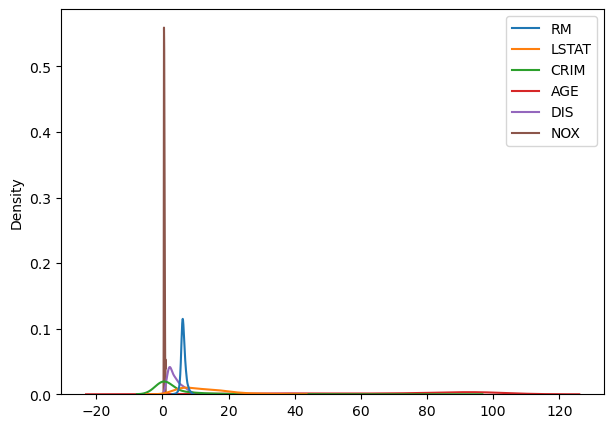

In [150]:
plt.figure(figsize=(7,5))
sns.kdeplot(X_train)

In [151]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()

standard_scaler.fit(X_train)
standard_X_train=standard_scaler.transform(X_train)

type(standard_X_train)

StandardScaler()

pandas.core.frame.DataFrame

<Axes: ylabel='Density'>

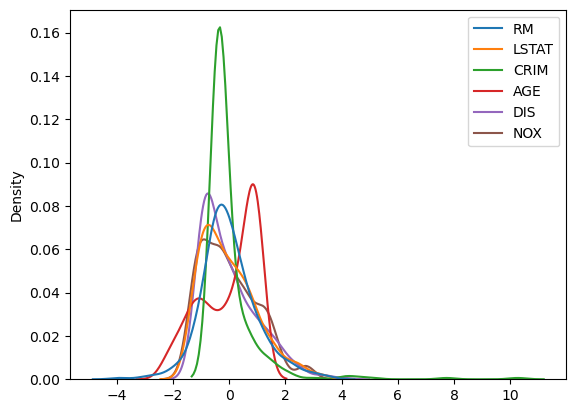

In [152]:
sns.kdeplot(standard_X_train)

MinMaxScaler()

<Axes: ylabel='Density'>

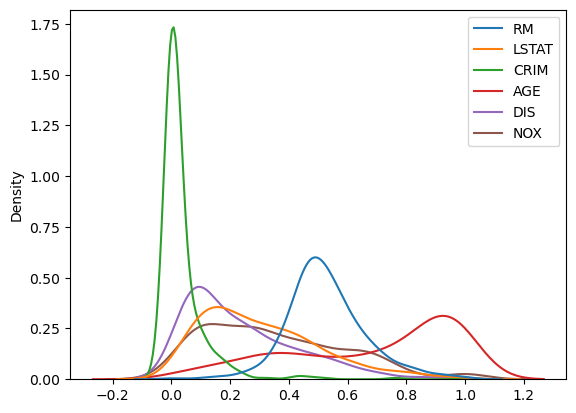

In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler_std = MinMaxScaler()

scaler_std.fit(X_train)
X_train_scaled_std = scaler_std.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
sns.kdeplot(X_train_scaled_std)

MaxAbsScaler()

<Axes: ylabel='Density'>

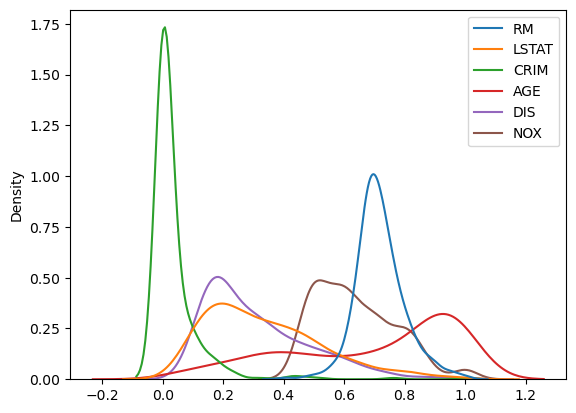

In [154]:
from sklearn.preprocessing import MaxAbsScaler
scaler_std = MaxAbsScaler()

scaler_std.fit(X_train)
X_train_scaled_std = scaler_std.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
sns.kdeplot(X_train_scaled_std)

RobustScaler()

<Axes: ylabel='Density'>

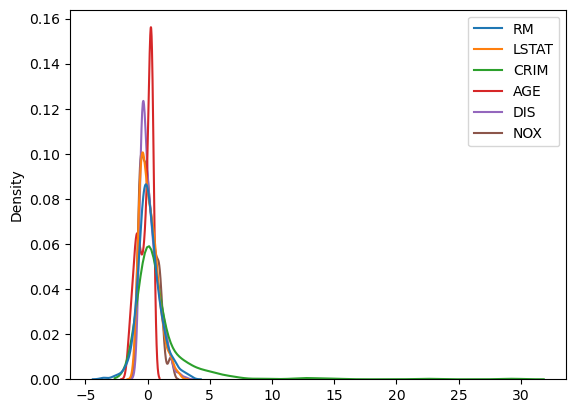

In [155]:
from sklearn.preprocessing import RobustScaler
scaler_std = RobustScaler()

scaler_std.fit(X_train)
X_train_scaled_std = scaler_std.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
sns.kdeplot(X_train_scaled_std)

In [156]:
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

preprocessor=Pipeline(steps=[
    ('winsorizer', Winsorizer(capping_method='gaussian', tail='both')),
    ('robust_scaler',StandardScaler())
])


preprocessor.fit(X_train)
X_train_scaled_std = preprocessor.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
X_train_scaled_std

Pipeline(steps=[('winsorizer', Winsorizer(tail='both')),
                ('robust_scaler', StandardScaler())])

,RM,LSTAT,CRIM,AGE,DIS,NOX
141,-1.874459,3.025189,-0.232534,1.107402,-1.141508,0.588213
272,0.333489,-0.669100,-0.502223,-0.367661,0.082408,-0.797821
135,0.038418,0.646619,-0.423282,1.043114,-0.809958,0.588213
298,0.052953,-1.062532,-0.511119,-1.746292,2.013677,-1.352235
122,-0.505211,0.784890,-0.506073,0.853820,-0.821713,0.215716
...,...,...,...,...,...,...
323,-0.872960,-0.097482,-0.472063,0.189506,0.479300,-0.546603
192,1.263763,-1.361883,-0.507204,-1.524854,1.347909,-1.031715
117,-0.417998,-0.302751,-0.495743,0.485947,-0.495496,-0.078816
47,-0.404916,0.908907,-0.481798,0.589523,0.957537,-0.936425


<Axes: ylabel='Density'>

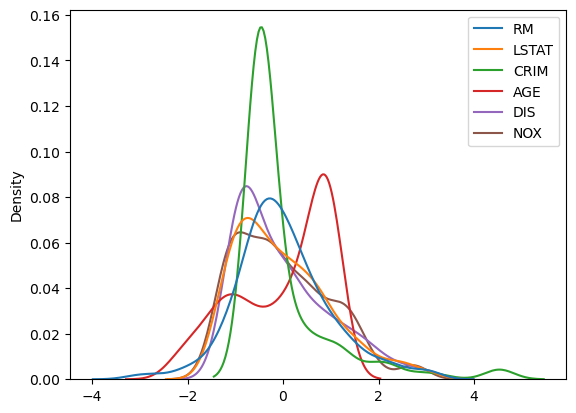

In [157]:
sns.kdeplot(X_train_scaled_std)

<Axes: ylabel='Density'>

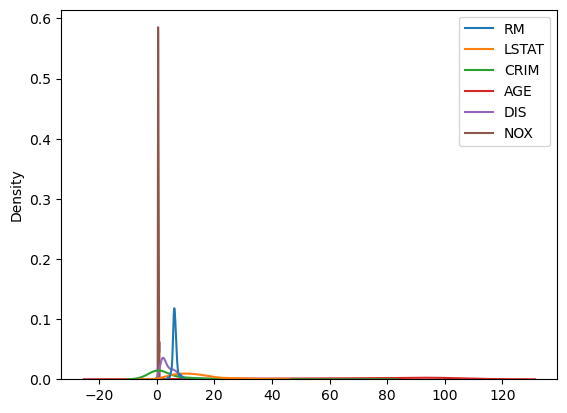

In [158]:
sns.kdeplot(X_test)
X_test_scaled_std = preprocessor.transform(X_test)

<Axes: ylabel='Density'>

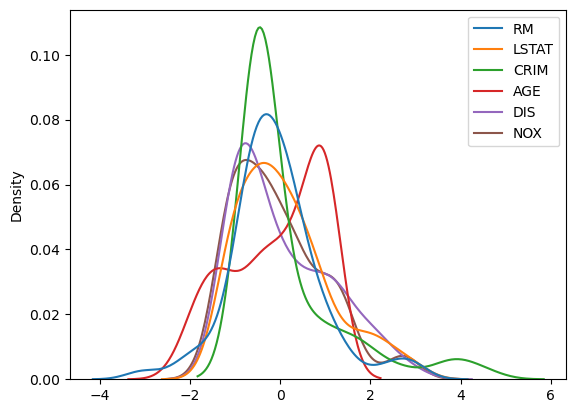

In [159]:
sns.kdeplot(X_test_scaled_std)

In [160]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train_scaled_std,y_train)
y_predict=model.predict(X_test_scaled_std)
print(f'Linear regression on robust scaled data {metrics.r2_score(y_test,y_predict)}')

LinearRegression()

Linear regression on robust scaled data 0.6081159805454743


In [161]:
model=LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print(f'Linear regression original scaled data {metrics.r2_score(y_test,y_predict)}')

LinearRegression()

Linear regression original scaled data 0.6118634129678713


In [162]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train_scaled_std,y_train)
y_predict=model.predict(X_test_scaled_std)
print(f'SVR on robust scaled data {metrics.r2_score(y_test,y_predict)}')

D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

SVR on robust scaled data 0.6350753808321172


In [164]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(X_train_scaled_std,y_train)
y_predict=model.predict(X_test_scaled_std)
print(f'SVR on robust scaled data {metrics.r2_score(y_test,y_predict)}')

D:\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

SVR on robust scaled data 0.6084813740850278


In [165]:
from sklearn.preprocessing import Normalizer

X = [
    [4, 1, 2, 2],
    [1, 3, 9, 3],
    [5, 7, 5, 1]
]

transformer = Normalizer().fit(X)   
normalized_X = transformer.transform(X)
print(normalized_X)


    x0   x1   x2   x3
0  0.8  0.2  0.4  0.4
1  0.1  0.3  0.9  0.3
2  0.5  0.7  0.5  0.1


In [170]:

X = [
    [4, 1, 2, 2],
    [1, 3, 9, 3],
    [5, 7, 5, 1]
]

transformer = Normalizer()

transformer.fit(X)
normalized_X=transformer.transform(X)
print(normalized_X)

Normalizer()

    x0   x1   x2   x3
0  0.8  0.2  0.4  0.4
1  0.1  0.3  0.9  0.3
2  0.5  0.7  0.5  0.1


Normalizer()

<Axes: ylabel='Density'>

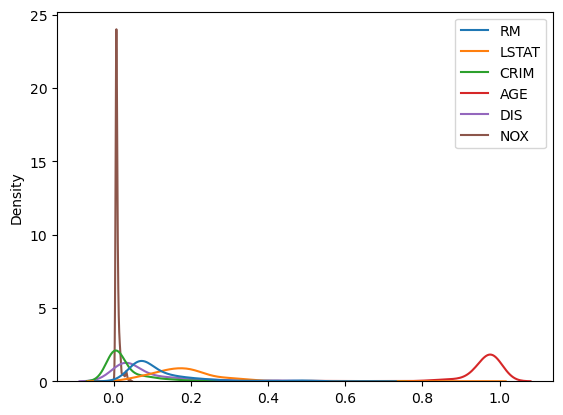

In [166]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train)
X_train_normal= normalizer.transform(X_train)
X_train_normal = pd.DataFrame(X_train_normal, columns=X_train.columns)
sns.kdeplot(X_train_normal)